In [3]:
# load in all the modules we're going to need
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Load Data

In [4]:
df = pd.read_csv("../cleaned_again_2.csv",keep_default_na=False)
df = df[~df['reviewText'].str.contains("\.jpg|\.png|\.jpeg|\.tiff|\.gif|\.bmp|\.heif", regex=True, na=False)]
#df[df.reviewText.str.contains(r'\b(\w*the\w*)\b', regex=True)].reviewText
# pprint(df.reviewText[9])
# df.reviewText[9].find("the")
# df.reviewText[9][245:260]
#df.to_csv('kindle_reviews_removed.csv', index=False)

Count review Lengths

In [5]:
df['reviewLength'] = df.reviewText.str.lower().str.split().apply(len)
lengths = df.reviewLength.value_counts()
print(f"Max text length is {df.reviewLength.max()}")

Max text length is 1778


In [6]:
# index = df.reviewLength.argmax()
# pprint(df.iloc[index].reviewText)

The distribution of review word count

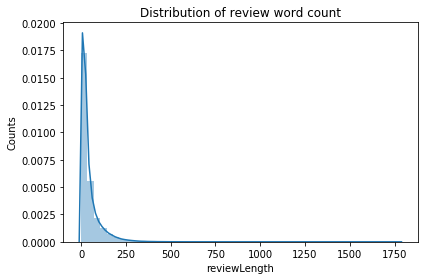

In [7]:
#remove_outliers = df[np.abs(df.reviewLength-df.reviewLength.mean())<=(3*df.reviewLength.std())] 
#keep only the ones that are within +3 to -3 standard deviations in the column 'reviewLength'

#ax = sns.distplot(remove_outliers.reviewLength)
ax = sns.distplot(df.reviewLength)
ax.set(ylabel='Counts', title="Distribution of review word count")
# Mention the removal of outliers due to long review lengths
ax.get_figure().tight_layout()
ax.get_figure().savefig("distribution_of_review_lengths.png")



# N-Grams after cleaning

In [8]:

rating1 = df['overall']==1
rating2 = df['overall']==2
rating3 = df['overall']==3
rating4 = df['overall']==4
rating5 = df['overall']==5

In [9]:
def generate_ngrams(text, n_gram=1):
    token = text.split()
    if "this" in token:
        print()
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [10]:
from collections import defaultdict

rating1_unigrams = defaultdict(int)
rating2_unigrams = defaultdict(int)
rating3_unigrams = defaultdict(int)
rating4_unigrams = defaultdict(int)
rating5_unigrams = defaultdict(int)

Uni-gram

In [11]:
for inx, review in enumerate(df[rating1]['reviewText']):
    for word in generate_ngrams(review):
        rating1_unigrams[word] += 1

for inx, review in enumerate(df[rating2]['reviewText']):
    for word in generate_ngrams(review):
        rating2_unigrams[word] += 1

for inx, review in enumerate(df[rating3]['reviewText']):
    for word in generate_ngrams(review):
        rating3_unigrams[word] += 1

for inx, review in enumerate(df[rating4]['reviewText']):
    for word in generate_ngrams(review):
        rating4_unigrams[word] += 1
        
for inx, review in enumerate(df[rating5]['reviewText']):
    for word in generate_ngrams(review):
        rating5_unigrams[word] += 1

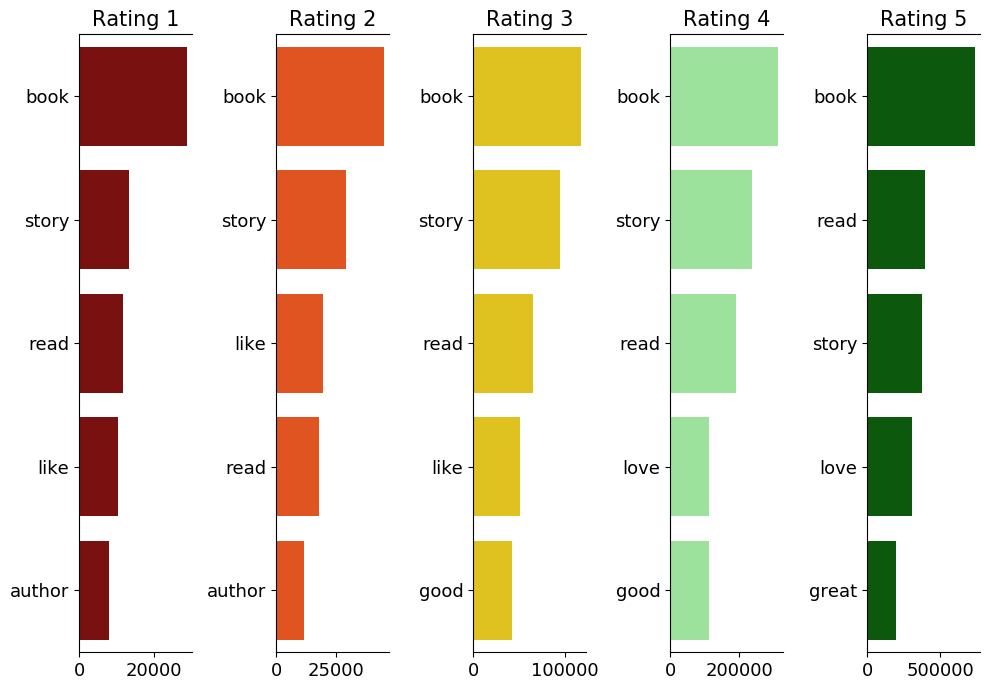

In [20]:
df_rating1_unigrams = pd.DataFrame(sorted(rating1_unigrams.items(), key=lambda x: x[1])[::-1])
df_rating2_unigrams = pd.DataFrame(sorted(rating2_unigrams.items(), key=lambda x: x[1])[::-1])
df_rating3_unigrams = pd.DataFrame(sorted(rating3_unigrams.items(), key=lambda x: x[1])[::-1])
df_rating4_unigrams = pd.DataFrame(sorted(rating4_unigrams.items(), key=lambda x: x[1])[::-1])
df_rating5_unigrams = pd.DataFrame(sorted(rating5_unigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(ncols=5, figsize=(10, 7), dpi=100)


N = 5 #only select top n unigrams

sns.barplot(y=df_rating1_unigrams[0].values[:N], x=df_rating1_unigrams[1].values[:N], ax=axes[0], color='darkred')
sns.barplot(y=df_rating2_unigrams[0].values[:N], x=df_rating2_unigrams[1].values[:N], ax=axes[1], color='orangered')
sns.barplot(y=df_rating3_unigrams[0].values[:N], x=df_rating3_unigrams[1].values[:N], ax=axes[2], color='gold')
sns.barplot(y=df_rating4_unigrams[0].values[:N], x=df_rating4_unigrams[1].values[:N], ax=axes[3], color='lightgreen')
sns.barplot(y=df_rating5_unigrams[0].values[:N], x=df_rating5_unigrams[1].values[:N], ax=axes[4], color='darkgreen')

for i in range(5):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Rating 1', fontsize=15)
axes[1].set_title(f'Rating 2', fontsize=15)
axes[2].set_title(f'Rating 3', fontsize=15)
axes[3].set_title(f'Rating 4', fontsize=15)
axes[4].set_title(f'Rating 5', fontsize=15)

plt.tight_layout()
plt.savefig("unigram_clean.png")

Bi-gram

In [13]:
rating1_bigrams = defaultdict(int)
rating2_bigrams = defaultdict(int)
rating3_bigrams = defaultdict(int)
rating4_bigrams = defaultdict(int)
rating5_bigrams = defaultdict(int)

In [14]:
for review in df[rating1]['reviewText']:
    for word in generate_ngrams(review, n_gram = 2):
        rating1_bigrams[word] += 1

for review in df[rating2]['reviewText']:
    for word in generate_ngrams(review, n_gram = 2):
        rating2_bigrams[word] += 1

for review in df[rating3]['reviewText']:
    for word in generate_ngrams(review, n_gram = 2):
        rating3_bigrams[word] += 1

for review in df[rating4]['reviewText']:
    for word in generate_ngrams(review, n_gram = 2):
        rating4_bigrams[word] += 1

for review in df[rating5]['reviewText']:
    for word in generate_ngrams(review, n_gram = 2):
        rating5_bigrams[word] += 1

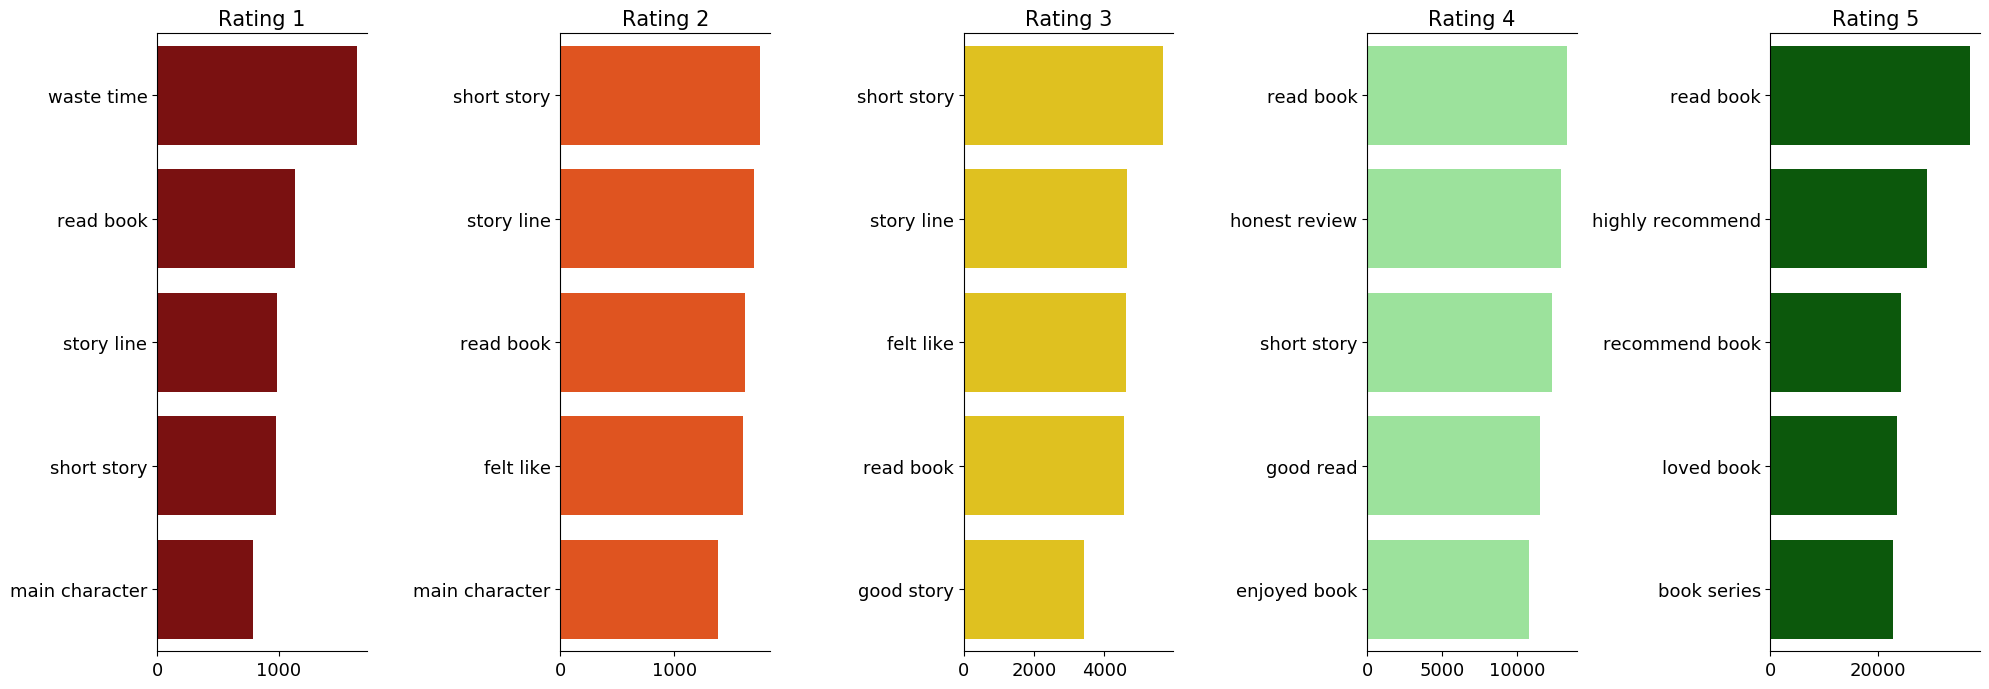

In [21]:
df_rating1_bigrams = pd.DataFrame(sorted(rating1_bigrams.items(), key=lambda x: x[1])[::-1])
df_rating2_bigrams = pd.DataFrame(sorted(rating2_bigrams.items(), key=lambda x: x[1])[::-1])
df_rating3_bigrams = pd.DataFrame(sorted(rating3_bigrams.items(), key=lambda x: x[1])[::-1])
df_rating4_bigrams = pd.DataFrame(sorted(rating4_bigrams.items(), key=lambda x: x[1])[::-1])
df_rating5_bigrams = pd.DataFrame(sorted(rating5_bigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(ncols=5, figsize=(20, 7), dpi=100)
plt.tight_layout()

N = 5 #only select top n unigrams

sns.barplot(y=df_rating1_bigrams[0].values[:N], x=df_rating1_bigrams[1].values[:N], ax=axes[0], color='darkred')
sns.barplot(y=df_rating2_bigrams[0].values[:N], x=df_rating2_bigrams[1].values[:N], ax=axes[1], color='orangered')
sns.barplot(y=df_rating3_bigrams[0].values[:N], x=df_rating3_bigrams[1].values[:N], ax=axes[2], color='gold')
sns.barplot(y=df_rating4_bigrams[0].values[:N], x=df_rating4_bigrams[1].values[:N], ax=axes[3], color='lightgreen')
sns.barplot(y=df_rating5_bigrams[0].values[:N], x=df_rating5_bigrams[1].values[:N], ax=axes[4], color='darkgreen')

for i in range(5):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Rating 1', fontsize=15)
axes[1].set_title(f'Rating 2', fontsize=15)
axes[2].set_title(f'Rating 3', fontsize=15)
axes[3].set_title(f'Rating 4', fontsize=15)
axes[4].set_title(f'Rating 5', fontsize=15)

plt.tight_layout()
plt.savefig("bigram_clean.png")

In [16]:
rating1_trigrams = defaultdict(int)
rating2_trigrams = defaultdict(int)
rating3_trigrams = defaultdict(int)
rating4_trigrams = defaultdict(int)
rating5_trigrams = defaultdict(int)

In [17]:
for review in df[rating1]['reviewText']:
    for inx, word in enumerate(generate_ngrams(review, n_gram = 3)):
        rating1_trigrams[word] += 1

for review in df[rating2]['reviewText']:
    for word in generate_ngrams(review, n_gram = 3):
        rating2_trigrams[word] += 1

for review in df[rating3]['reviewText']:
    for word in generate_ngrams(review, n_gram = 3):
        rating3_trigrams[word] += 1

for review in df[rating4]['reviewText']:
    for word in generate_ngrams(review, n_gram = 3):
        rating4_trigrams[word] += 1

for review in df[rating5]['reviewText']:
    for word in generate_ngrams(review, n_gram = 3):
        rating5_trigrams[word] += 1

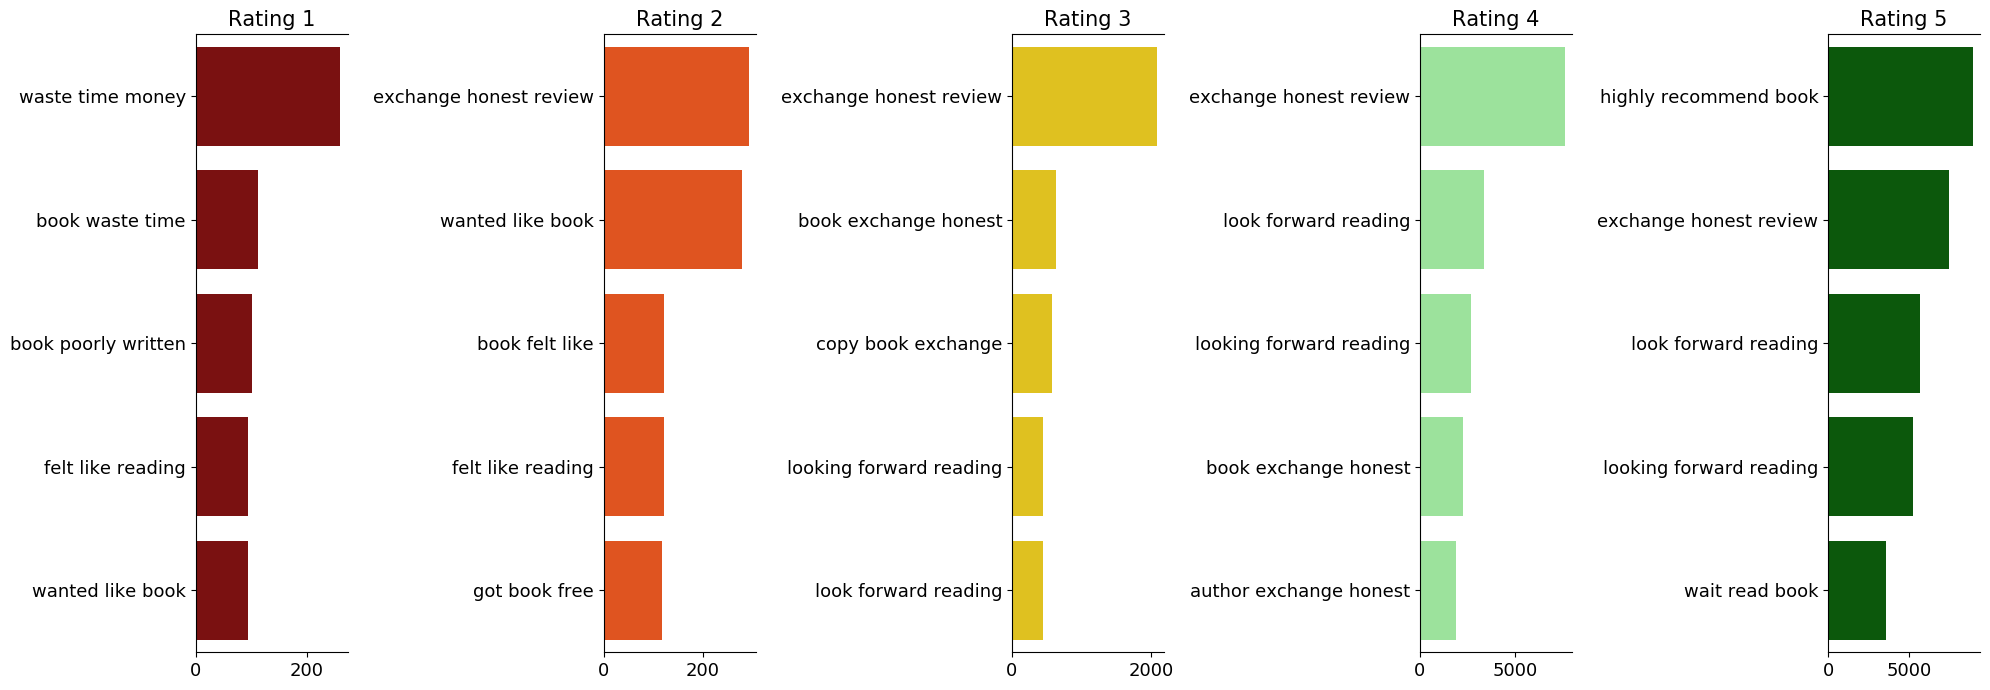

In [22]:
df_rating1_trigrams = pd.DataFrame(sorted(rating1_trigrams.items(), key=lambda x: x[1])[::-1])
df_rating2_trigrams = pd.DataFrame(sorted(rating2_trigrams.items(), key=lambda x: x[1])[::-1])
df_rating3_trigrams = pd.DataFrame(sorted(rating3_trigrams.items(), key=lambda x: x[1])[::-1])
df_rating4_trigrams = pd.DataFrame(sorted(rating4_trigrams.items(), key=lambda x: x[1])[::-1])
df_rating5_trigrams = pd.DataFrame(sorted(rating5_trigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(ncols=5, figsize=(20, 7), dpi=100)

N = 5 #only select top n unigrams

sns.barplot(y=df_rating1_trigrams[0].values[:N], x=df_rating1_trigrams[1].values[:N], ax=axes[0], color='darkred')
sns.barplot(y=df_rating2_trigrams[0].values[:N], x=df_rating2_trigrams[1].values[:N], ax=axes[1], color='orangered')
sns.barplot(y=df_rating3_trigrams[0].values[:N], x=df_rating3_trigrams[1].values[:N], ax=axes[2], color='gold')
sns.barplot(y=df_rating4_trigrams[0].values[:N], x=df_rating4_trigrams[1].values[:N], ax=axes[3], color='lightgreen')
sns.barplot(y=df_rating5_trigrams[0].values[:N], x=df_rating5_trigrams[1].values[:N], ax=axes[4], color='darkgreen')

for i in range(5):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Rating 1', fontsize=15)
axes[1].set_title(f'Rating 2', fontsize=15)
axes[2].set_title(f'Rating 3', fontsize=15)
axes[3].set_title(f'Rating 4', fontsize=15)
axes[4].set_title(f'Rating 5', fontsize=15)

plt.tight_layout()
plt.savefig("trigram_clean.png")


Embeddings percentage